# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [0]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


In [0]:
data = pd.read_csv('/content/drive/My Drive/AppliedAI/preprocessed_data.csv')

In [3]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
data.columns.values

array(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price'], dtype=object)

### For title

Pre-processing project title

In [0]:

data1 = pd.read_csv('/content/drive/My Drive/AppliedAI/train_data.csv')

In [6]:
data1.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [0]:
project_title = data1['project_title']

In [0]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [9]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text


preprocessed_titles = preprocess_text(data1['project_title'].values)


100%|██████████| 109248/109248 [00:02<00:00, 46574.78it/s]


In [10]:
#number of project title
len(data)

109248

In [0]:
    #Appending preprocessed_title to data
    data["project_title"] = preprocessed_titles

In [0]:
#Seperating class label from features
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'], axis=1)



In [0]:
# train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.33, stratify=y_train)

In [14]:
len(x)

109248

In [0]:
#final feature names for picking top 20 features
final_feature_names = []



## 1.1 BoW Implementation

**Essay Vectorization**

In [16]:

print(x_train.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer.fit(x_train['essay'].values) # fit has to happen only on train data

x_train_essay_bow = vectorizer.transform(x_train['essay'].values)
x_cv_essay_bow = vectorizer.transform(x_cv['essay'].values)
x_test_essay_bow = vectorizer.transform(x_test['essay'].values)
    
final_feature_names +=  vectorizer.get_feature_names()
print(len(final_feature_names))

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_cv_essay_bow.shape, y_cv.shape)
print(x_test_essay_bow.shape, y_test.shape)


(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
5000
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


**Project Title Vectorization**

In [17]:
#project title
print(x_train.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer.fit(x_train['project_title'].values) # fit has to happen only on train data

x_train_project_title_bow = vectorizer.transform(x_train['project_title'].values)
x_cv_project_title_bow = vectorizer.transform(x_cv['project_title'].values)
x_test_project_title_bow = vectorizer.transform(x_test['project_title'].values)
final_feature_names += vectorizer.get_feature_names()
print(len(final_feature_names))


print("After vectorizations")
print(x_train_project_title_bow.shape, y_train.shape)
print(x_cv_project_title_bow.shape, y_cv.shape)
print(x_test_project_title_bow.shape, y_test.shape)


(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
8447
After vectorizations
(49041, 3447) (49041,)
(24155, 3447) (24155,)
(36052, 3447) (36052,)


**School State Encoding**

In [18]:
#School state encoding
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
x_cv_state_ohe = vectorizer.transform(x_cv['school_state'].values)
x_test_state_ohe = vectorizer.transform(x_test['school_state'].values)

final_feature_names +=  vectorizer.get_feature_names()
print(len(final_feature_names))



print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_cv_state_ohe.shape, y_cv.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

8498
After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


**Teacher Prefix Encoding**

In [19]:
#Teacher prefix encoding
vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer.transform(x_train['teacher_prefix'].values)
x_cv_teacher_ohe = vectorizer.transform(x_cv['teacher_prefix'].values)
x_test_teacher_ohe = vectorizer.transform(x_test['teacher_prefix'].values)

final_feature_names +=  vectorizer.get_feature_names()
print(len(final_feature_names))



print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_cv_teacher_ohe.shape, y_cv.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

8503
After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


**Project Grade Encoding**

In [20]:
#project grade encoding
vectorizer = CountVectorizer()
vectorizer.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer.transform(x_train['project_grade_category'].values)
x_cv_grade_ohe = vectorizer.transform(x_cv['project_grade_category'].values)
x_test_grade_ohe = vectorizer.transform(x_test['project_grade_category'].values)

final_feature_names +=  vectorizer.get_feature_names()
print(len(final_feature_names))



print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
print(x_cv_grade_ohe.shape, y_cv.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

8507
After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


**Categories encoding**

In [21]:
#clean_categories encoding
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_cat_ohe = vectorizer.transform(x_train['clean_categories'].values)
x_cv_clean_cat_ohe = vectorizer.transform(x_cv['clean_categories'].values)
x_test_clean_cat_ohe = vectorizer.transform(x_test['clean_categories'].values)

final_feature_names +=  vectorizer.get_feature_names()
print(len(final_feature_names))



print("After vectorizations")
print(x_train_clean_cat_ohe.shape, y_train.shape)
print(x_cv_clean_cat_ohe.shape, y_cv.shape)
print(x_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

8516
After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


**Sub-categories encoding**

In [22]:
#clean_subcategories encoding
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_subcat_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_cv_subcat_ohe = vectorizer.transform(x_cv['clean_subcategories'].values)
x_test_subcat_ohe = vectorizer.transform(x_test['clean_subcategories'].values)

final_feature_names +=  vectorizer.get_feature_names()
print(len(final_feature_names))



print("After vectorizations")
print(x_train_subcat_ohe.shape, y_train.shape)
print(x_cv_subcat_ohe.shape, y_cv.shape)
print(x_test_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

8546
After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


**Prize Normalization**

In [23]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()


normalizer.fit(x_train['price'].values.reshape(-1,1))

x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))
x_cv_price_norm = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))

final_feature_names +=  ['price']
print(len(final_feature_names))




print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_cv_price_norm.shape, y_cv.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

8547
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


**teacher_number_of_previously_posted_projects normalization**

In [24]:

normalizer = Normalizer()



normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_teacher_num_norm = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_cv_teacher_num_norm = normalizer.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_num_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

final_feature_names +=  ['teacher_number_of_previously_posted_projects']
print(len(final_feature_names))



print("After vectorizations")
print(x_train_teacher_num_norm.shape, y_train.shape)
print(x_cv_teacher_num_norm.shape, y_cv.shape)
print(x_test_teacher_num_norm.shape, y_test.shape)
print("="*100)

8548
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [25]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
x_tr = hstack((x_train_essay_bow,x_train_project_title_bow, x_train_state_ohe, x_train_teacher_ohe, x_train_grade_ohe,x_train_clean_cat_ohe,x_train_subcat_ohe, x_train_price_norm,x_train_teacher_num_norm)).tocsr()
x_cr = hstack((x_cv_essay_bow,x_cv_project_title_bow, x_cv_state_ohe, x_cv_teacher_ohe, x_cv_grade_ohe,x_cv_clean_cat_ohe,x_cv_subcat_ohe, x_cv_price_norm,x_cv_teacher_num_norm)).tocsr()
x_te = hstack((x_test_essay_bow,x_test_project_title_bow, x_test_state_ohe, x_test_teacher_ohe, x_test_grade_ohe,x_test_clean_cat_ohe,x_test_subcat_ohe, x_test_price_norm,x_test_teacher_num_norm)).tocsr()

print("Final Data matrix")
print(x_tr.shape, y_train.shape)
print(x_cr.shape, y_cv.shape)
print(x_te.shape, y_test.shape)
print(len(final_feature_names))
print("="*100)

Final Data matrix
(49041, 8548) (49041,)
(24155, 8548) (24155,)
(36052, 8548) (36052,)
8548


### Finding best hyper-parameter using RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


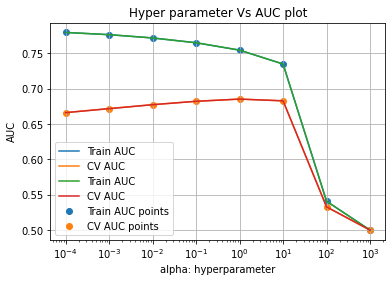

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.056013,0.000733,0.018101,0.000838,0.0001,{'alpha': 0.0001},0.669590,0.661500,0.667346,0.666146,0.003410,6,0.777827,0.783671,0.777053,0.779517,0.002954
1,0.054557,0.001521,0.017326,0.000390,0.001,{'alpha': 0.001},0.675304,0.667422,0.672643,0.671790,0.003274,5,0.774678,0.780410,0.773985,0.776357,0.002879
2,0.057896,0.003658,0.018706,0.000777,0.01,{'alpha': 0.01},0.680640,0.673304,0.678159,0.677367,0.003047,4,0.770062,0.775669,0.769399,0.771710,0.002813
3,0.056105,0.001750,0.017465,0.000885,0.1,{'alpha': 0.1},0.685118,0.678218,0.683134,0.682157,0.002901,3,0.763320,0.768808,0.762642,0.764923,0.002761
4,0.052802,0.000655,0.017159,0.000237,1,{'alpha': 1},0.687864,0.681428,0.686536,0.685276,0.002775,1,0.752956,0.758287,0.752226,0.754490,0.002702


In [26]:
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import random 
import matplotlib.pyplot as plt


nb_bow = MultinomialNB()

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
classifier = RandomizedSearchCV(nb, parameters, cv=3, return_train_score=True,scoring='roc_auc',)

classifier.fit(x_tr,y_train)

results = pd.DataFrame.from_dict(classifier.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']


plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.semilogx(alpha, train_auc, label='Train AUC')
plt.semilogx(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()


In [0]:
#Best hyper-parameter
bow_alpha = 10

### Training Model for best Alpha

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

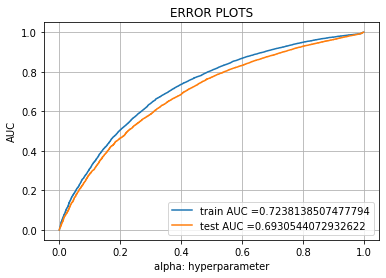

In [29]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


nb_bow = MultinomialNB(alpha=bow_alpha)
nb_bow.fit(x_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs



y_train_pred = batch_predict(nb_bow, x_tr)    
y_test_pred = batch_predict(nb_bow, x_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_auc_bow = round(auc(train_fpr, train_tpr),2)
test_auc_bow = round(auc(test_fpr, test_tpr),2)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



In [0]:
import numpy as np

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Confusion Matrix 

In [31]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4524237234348346 for threshold 0.978
Train confusion matrix
[[ 5054  2372]
 [13951 27664]]
Test confusion matrix
[[ 3437  2022]
 [10353 20240]]


## 1.2 Tf-idf Implementation



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer


**Essay Tf-idf vectorization**

In [34]:
print(x_train.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer.fit(x_train['essay'].values) # fit has to happen only on train data

x_train_essay_tfidf = vectorizer.transform(x_train['essay'].values)
x_cv_essay_tfidf = vectorizer.transform(x_cv['essay'].values)
x_test_essay_tfidf = vectorizer.transform(x_test['essay'].values)
    

print("After vectorizations")
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_cv_essay_tfidf.shape, y_cv.shape)
print(x_test_essay_tfidf.shape, y_test.shape)


(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


**Project Title Tf-idf vectorization**

In [35]:
#project title
print(x_train.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)

print("="*100)

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer.fit(x_train['project_title'].values)  # fit has to happen only on train data

x_train_project_title_tfidf = vectorizer.transform(x_train['project_title'].values)
x_cv_project_title_tfidf = vectorizer.transform(x_cv['project_title'].values)
x_test_project_title_tfidf = vectorizer.transform(x_test['project_title'].values)
    

print("After vectorizations")
print(x_train_project_title_tfidf.shape, y_train.shape)
print(x_cv_project_title_tfidf.shape, y_cv.shape)
print(x_test_project_title_tfidf.shape, y_test.shape)


(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
After vectorizations
(49041, 3447) (49041,)
(24155, 3447) (24155,)
(36052, 3447) (36052,)


**Final data matrix**

In [36]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
x_tr = hstack((x_train_essay_tfidf,x_train_project_title_tfidf, x_train_state_ohe, x_train_teacher_ohe, x_train_grade_ohe,x_train_clean_cat_ohe,x_train_subcat_ohe, x_train_price_norm,x_train_teacher_num_norm)).tocsr()
x_cr = hstack((x_cv_essay_tfidf,x_cv_project_title_tfidf, x_cv_state_ohe, x_cv_teacher_ohe, x_cv_grade_ohe,x_cv_clean_cat_ohe,x_cv_subcat_ohe, x_cv_price_norm,x_cv_teacher_num_norm)).tocsr()
x_te = hstack((x_test_essay_tfidf,x_test_project_title_tfidf, x_test_state_ohe, x_test_teacher_ohe, x_test_grade_ohe,x_test_clean_cat_ohe,x_test_subcat_ohe, x_test_price_norm,x_test_teacher_num_norm)).tocsr()

print("Final Data matrix")
print(x_tr.shape, y_train.shape)
print(x_cr.shape, y_cv.shape)
print(x_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 8548) (49041,)
(24155, 8548) (24155,)
(36052, 8548) (36052,)


### Hyper parameter tuning for tf-idf  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


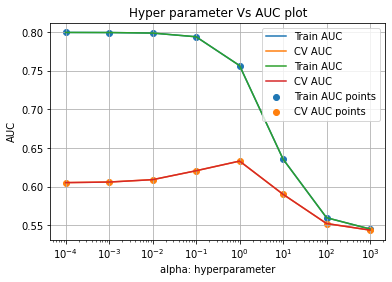

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.052759,0.001813,0.018010,0.000695,0.0001,{'alpha': 0.0001},0.606335,0.598528,0.610713,0.605192,0.005040,5,0.796244,0.801368,0.800512,0.799375,0.002241
1,0.053001,0.002547,0.018812,0.003193,0.001,{'alpha': 0.001},0.607297,0.599323,0.611182,0.605934,0.004937,4,0.796136,0.801268,0.800358,0.799254,0.002236
2,0.051813,0.001986,0.017911,0.001140,0.01,{'alpha': 0.01},0.610717,0.602990,0.613330,0.609012,0.004390,3,0.795483,0.800601,0.799615,0.798566,0.002217
3,0.049190,0.000324,0.017058,0.000475,0.1,{'alpha': 0.1},0.621928,0.616011,0.623702,0.620547,0.003288,2,0.790692,0.795524,0.795100,0.793772,0.002185
4,0.050385,0.000663,0.016512,0.000490,1,{'alpha': 1},0.633112,0.628677,0.637319,0.633036,0.003529,1,0.753202,0.757272,0.759014,0.756496,0.002435


In [37]:
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import random 
import matplotlib.pyplot as plt


nb = MultinomialNB()

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
classifier = RandomizedSearchCV(nb, parameters, cv=3, return_train_score=True,scoring='roc_auc',)

classifier.fit(x_tr,y_train)


results = pd.DataFrame.from_dict(classifier.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']


plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.semilogx(alpha, train_auc, label='Train AUC')
plt.semilogx(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()


In [0]:
#Best alpha
tfidf_alpha = 1

**Traning model on best alpha**

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

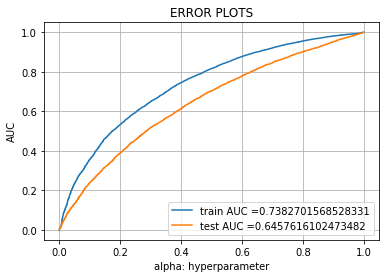

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


nb = MultinomialNB(alpha=tfidf_alpha)
nb.fit(x_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb, x_tr)    
y_test_pred = batch_predict(nb, x_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_auc_tfidf = round(auc(train_fpr, train_tpr),2)
test_auc_tfidf = round(auc(test_fpr, test_tpr),2)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

**Confusion Matrix**

In [42]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.45501847553557306 for threshold 0.862
Train confusion matrix
[[ 5164  2262]
 [14385 27230]]
Test confusion matrix
[[ 3149  2310]
 [11066 19527]]


## 2. Top 20 features


In [45]:
#Reffered from
#https://datascience.stackexchange.com/questions/65219/find-the-top-n-features-from-feature-set-using-absolute-values-of-feature-log-p

# For positive class

sorted_prob_class_1_ind = nb_bow.feature_log_prob_[1, :].argsort()
# For negative class
sorted_prob_class_0_ind = nb_bow.feature_log_prob_[0, :].argsort()

Most_imp_words_1 = []
Most_imp_words_0 = []

for index in sorted_prob_class_1_ind[-20:-1]:
    Most_imp_words_1.append(final_feature_names[index])

for index in sorted_prob_class_0_ind[-20:-1]:
    Most_imp_words_0.append(final_feature_names[index])

print("20 most imp features for positive class:\n")
print(Most_imp_words_1)

print("\n" + "-"*100)

print("\n20 most imp features for negative class:\n")
print(Most_imp_words_0)

20 most imp features for positive class:

['mr', 'grades_9_12', 'appliedlearning', 'students', 'specialneeds', 'specialneeds', 'health_sports', 'ca', 'grades_6_8', 'literature_writing', 'mathematics', 'literacy', 'grades_3_5', 'ms', 'math_science', 'grades_prek_2', 'literacy_language', 'mrs', 'teacher_number_of_previously_posted_projects']

----------------------------------------------------------------------------------------------------

20 most imp features for negative class:

['grades_9_12', 'appliedsciences', 'students', 'appliedlearning', 'health_sports', 'ca', 'specialneeds', 'specialneeds', 'grades_6_8', 'literature_writing', 'literacy', 'mathematics', 'grades_3_5', 'ms', 'math_science', 'grades_prek_2', 'literacy_language', 'mrs', 'teacher_number_of_previously_posted_projects']


## 3. Summary

In [46]:
from prettytable import PrettyTable
t = PrettyTable(['Vectorizer', 'Model','Alpha(Hyper-parameter)','Train AUC','Test AUC'])
t.add_row(['BoW', 'Multinominal Naive Bayes',bow_alpha,train_auc_bow,test_auc_bow])
t.add_row(['Tf-idf', 'Multinominal Naive Bayes',tfidf_alpha,train_auc_tfidf,test_auc_tfidf])
print(t)

+------------+--------------------------+------------------------+-----------+----------+
| Vectorizer |          Model           | Alpha(Hyper-parameter) | Train AUC | Test AUC |
+------------+--------------------------+------------------------+-----------+----------+
|    BoW     | Multinominal Naive Bayes |           10           |    0.72   |   0.69   |
|   Tf-idf   | Multinominal Naive Bayes |           1            |    0.74   |   0.65   |
+------------+--------------------------+------------------------+-----------+----------+
